# Hannan's Lesson 9 Notebook

In [14]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

1)	The tips.csv dataset contains data on tips collected from a restaurant. 
a.	Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.
b.	Repeat part a, but broken down by time. 

In [15]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [16]:
avg_tip_by_sex = tips.select('tip','sex').group('sex', np.mean)
avg_tip_by_sex

sex,tip mean
Female,2.83345
Male,3.08962


C:\Users\C20Rao.AbdulHannan.p\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


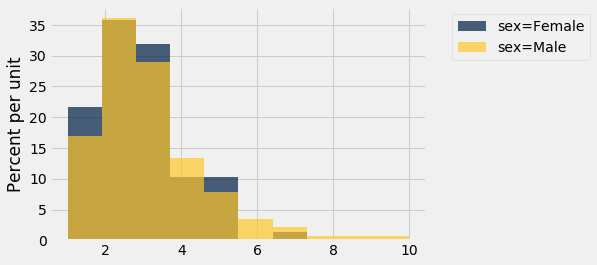

In [17]:
tips.hist('tip', group = 'sex')

From the histogram, it can be concluded that on average, males tip more than females.

In [18]:
avg_tip_by_time = tips.select('tip','time').group('time', np.mean)
avg_tip_by_time

time,tip mean
Dinner,3.10267
Lunch,2.72809


2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [19]:
def weekday_to_num(x):
    if x == 'Mon':
        return 1
    elif x == 'Tue':
        return 2
    elif x == 'Wed':
        return 3
    elif x == 'Thur':
        return 4
    elif x == 'Fri':
        return 5
    elif x == 'Sat':
        return 6
    else:
        return 7

In [20]:
weekday_to_num('Mon') # Testing the function

1

In [21]:
weekday_to_num('Sun') # Testing the function

7

3)	Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [22]:
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [23]:
tips = tips.with_column('weekday_num', tips.apply(weekday_to_num, 'day'))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4)	Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of 20, we will simply look at all total bills near 20 and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of 1, we will look at all bills totaling 19 thru 21. The output of this function will be the predicted tip amount. 

In [24]:
def est_tip(bill_amount, window):
    predicted_tip = np.mean((tips.where(0, are.between(bill_amount-window, bill_amount+window))).column(1))
    return predicted_tip
    

5)	Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

In [28]:
tips = tips.with_column('Predicted Tip', tips.apply(est_tip, 'total_bill', 1))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,7,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,7,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,7,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,7,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,7,3.67526
8.77,2,Male,No,Sun,Dinner,2,7,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,7,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,7,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,7,2.46231


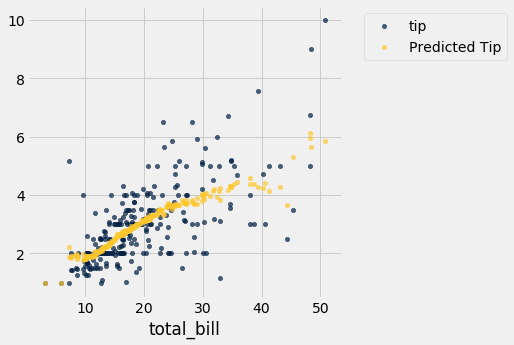

In [32]:
(tips.select(0,1,8)).scatter(0)